<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
IMG_SHAPE = (28,28, 1)
NOISE_DIM = 128
LABEL_DIM = 10

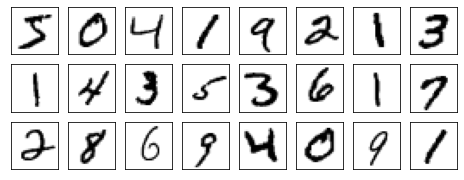

((60000, 28, 28, 1), (60000, 10))

In [2]:
# 데이터 로드
from data_loader import *
from utils import display_sample_img
x_train, y_train, _, _ = mnist_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape, y_train.shape

# 이미지 -1~1 제네레이터가 -1~1 까지의 이미지를 생성해야 한다.

In [3]:
# 모델 구성
from model import BuildModel
builder = BuildModel(IMG_SHAPE, NOISE_DIM, LABEL_DIM)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 noise (InputLayer)             [(None, 128)]        0           []                               
                                                                                                  
 condition (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['noise[0][0]',                  
                                                                  'condition[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 6272)         871808      ['concatenate[0][0]']    

In [8]:
# 학습
from cgan import CGAN
model = CGAN(gene, disc, IMG_SHAPE, NOISE_DIM, LABEL_DIM)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999, epsilon=10e-8))
model.cgan.summary()

Model: "CGAN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 Generator (Functional)         (None, 28, 28, 1)    1079041     ['input_5[0][0]',                
                                                                  'input_6[0][0]']                
                                                                                                  
 Discriminator (Functional)     (None, 1)            244865      ['Generator[2][0]',           

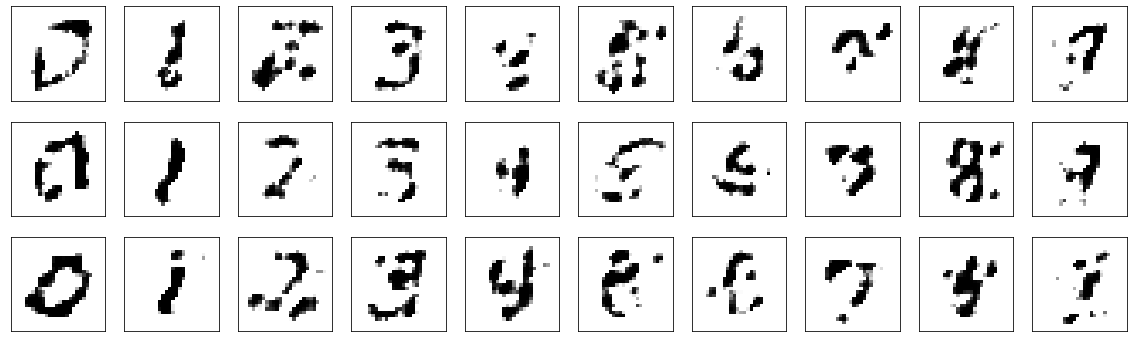

* epoch: 1, d_loss: 1612.924624, g_loss: 854.343398


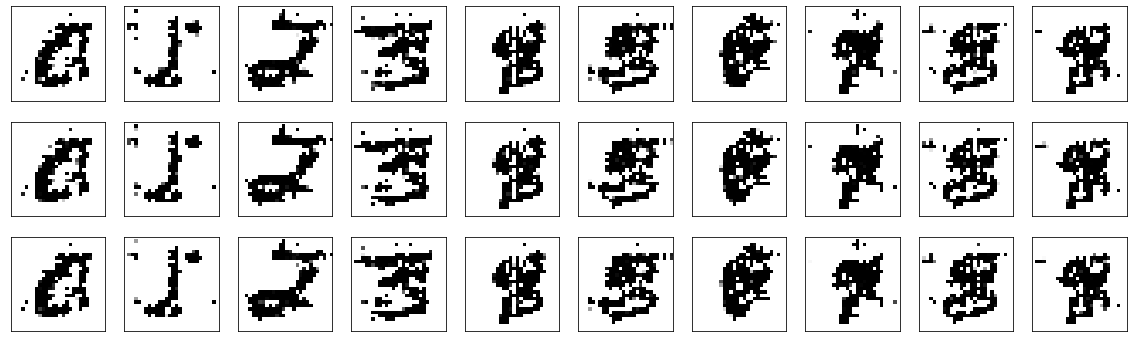

* epoch: 2, d_loss: 1704.818578, g_loss: 747.555142


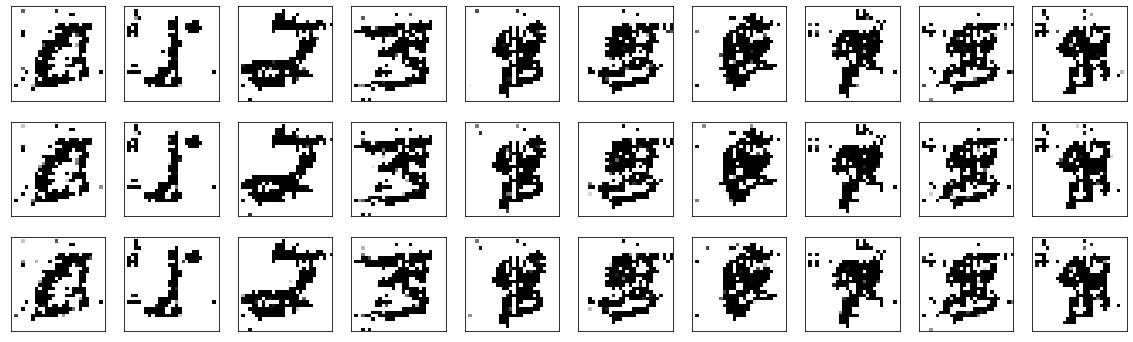

* epoch: 3, d_loss: 1724.670714, g_loss: 728.525230


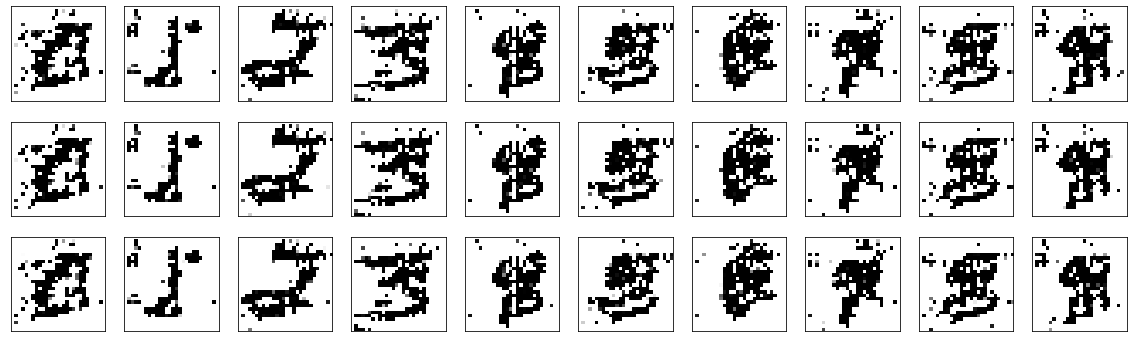

* epoch: 4, d_loss: 1740.782101, g_loss: 714.579599


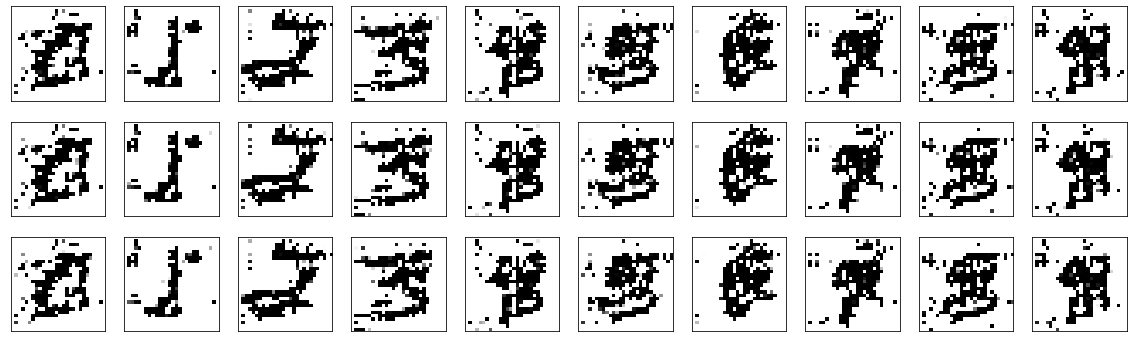

* epoch: 5, d_loss: 1750.050234, g_loss: 703.805753


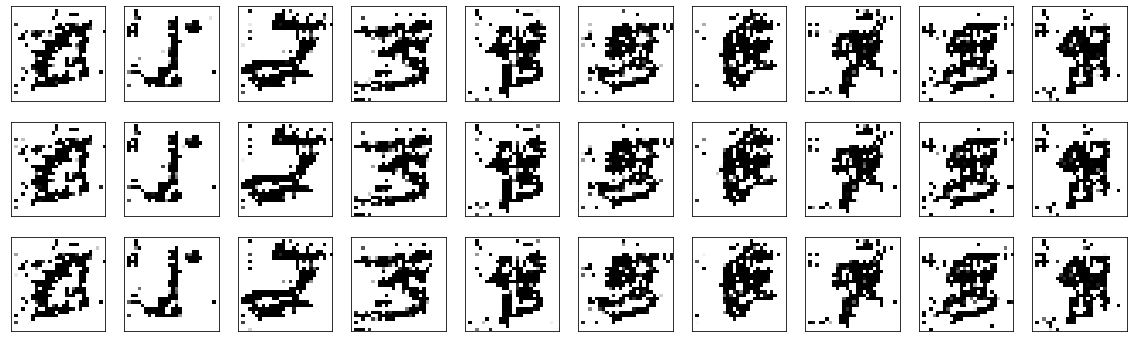

In [9]:
model.fit(x_train, y_train, epochs = 5)